In [12]:
!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

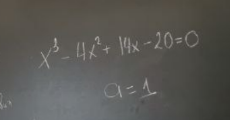

In [3]:
def f(x):
    return x**3 - 4 * x**2 + 14 * x - 20

In [4]:
def dfdx(x):
    return 3 * x**2 -  8 * x + 14

In [5]:
def Newton(x, eps):
    max_iterations = 10000
    iterations = 0
    while (abs(f(x)) > eps) and (iterations < max_iterations):
        x = x - f(x)/dfdx(x)
        iterations = iterations + 1
    return x, iterations

In [6]:
eps = np.finfo(float).eps
# eps = 0.1
x = 1
value, iterat = Newton(x, eps)
print(value, iterat)

2.0 1


In [7]:
eps = np.finfo(float).eps
# eps = 0.1
x = -100000000000000000000000
value, iterat = Newton(x, eps)
print(value, iterat)

2.0 135


In [8]:
eps = np.finfo(float).eps
# eps = 0.1
x = 10**6
value, iterat = Newton(x, eps)
print(value, iterat)

2.0 37


In [11]:
eps = np.finfo(float).eps
# eps = 0.1
x = 10**6*1j
value, iterat = Newton(x, eps)
print(value, iterat)

(1+3j) 37


In [12]:
eps = np.finfo(float).eps
# eps = 0.1
x = 0 - 3j
value, iterat = Newton(x, eps)
print(value, iterat)

(0.9999999999999999-3j) 7


In [13]:
def Newton(x, eps):
    max_iterations = 10000
    iterations = 0
    while (abs(f(x)) > eps) and (iterations < max_iterations):
        x = x - f(x)/dfdx(x)
        iterations = iterations + 1
    return x

In [14]:
def assign_color(root):
    if np.isclose(root, 2, atol=1e-6):
        return (0, 1, 0)  # зелёный
    elif np.isclose(root, 1+3j, atol=1e-6):
        return (0, 0, 1)  # красный
    elif np.isclose(root, 1-3j, atol=1e-6):
        return (1, 0, 0)  # синий
    else:
        return (0, 0, 0)  # чёрный (по умолчанию)

In [15]:
xmin, xmax, ymax, ymin = -10, 10, -10, 10
num_points = 100
eps = np.finfo(float).eps

In [16]:
x_points = np.linspace(xmin, xmax, num_points)
y_points = np.linspace(ymin, ymax, num_points)
X, Y = np.meshgrid(x_points, y_points)
complex_plane = X + 1j*Y

In [17]:
colors = np.zeros(complex_plane.shape + (3,), dtype=np.uint8)
i, j = 73, 15
x0 = complex_plane[i, j]
x_n = x0
convergence_route = [x_n]

for _ in range(50):
    x_n1 = x_n - f(x_n) / dfdx(x_n)
    convergence_route.append(x_n1)
    x_n = x_n1
    
x_vals = [point.real for point in convergence_route]
y_vals = [point.imag for point in convergence_route]

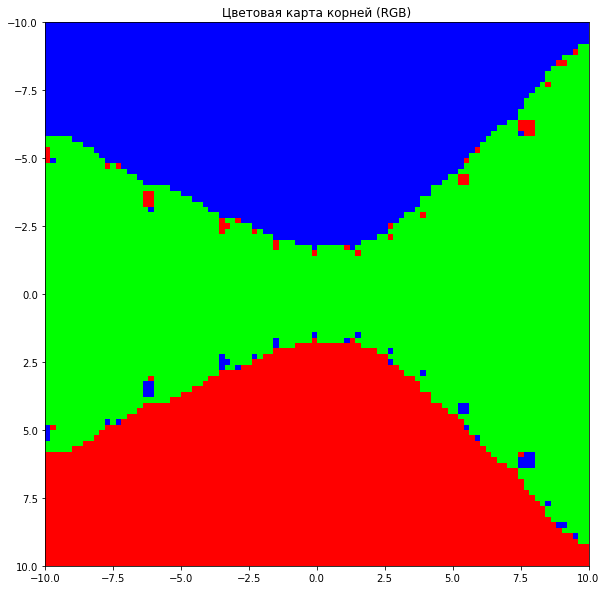

In [18]:
for i in range(num_points):
    for j in range(num_points):
        x0 = complex_plane[i, j]
        root = Newton(x0, eps)
        colors[i, j] = np.array(assign_color(root)) * 255

plt.figure(figsize=(10, 10))
plt.imshow(colors, extent=(xmin, xmax, ymin, ymax), interpolation='none')
plt.title("Цветовая карта корней (RGB)")

plt.show()

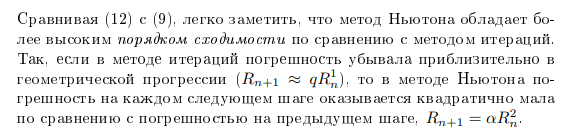